1) **Introduction**

This project analyzes ride booking data to understand booking trends, cancellation behavior, and demand patterns.
The objective is to derive business insights that can help reduce ride cancellations and improve operational efficiency.

2) Importing Required Libraries

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

3) Loading the DataSet

In [209]:
df = pd.read_csv('Ride_Booking_and_Cancellation_Analysis.csv')
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Vehicle Images,Unnamed: 20
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,...,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN,#NAME?,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,...,NaN,No,NaN,158,Cash,13,4.1,4.0,#NAME?,NaN
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,...,NaN,No,NaN,386,UPI,40,4.2,4.8,#NAME?,NaN
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,...,NaN,NaN,NaN,384,NaN,0,NaN,NaN,#NAME?,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,...,NaN,No,NaN,822,Credit Card,45,4.0,3.0,#NAME?,NaN


4) Dataset Overview

In [210]:
print(f"The shape of the dataset is : {df.shape}")
print("Info : ")
df.info()
print("The columns are : ")
df.columns

The shape of the dataset is : (103024, 21)
Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       63967 non-null   float64
 9   C_TAT                       63967 non-null   float64
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides     

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Vehicle Images', 'Unnamed: 20'],
      dtype='object')

5) Data Cleaning

5.1 Removing Irrelevant Columns : Duplicate and irrelevant columns (e.g., images, unnamed index columns) were removed.

In [211]:
df.drop(['Vehicle Images','Unnamed: 20'],axis = 1, inplace = True)
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2024-07-26 14:00:00,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,NaN,NaN,NaN,Personal & Car related issue,NaN,NaN,444,NaN,0,NaN,NaN
1,2024-07-25 22:20:00,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203.0,30.0,NaN,NaN,No,NaN,158,Cash,13,4.1,4.0
2,2024-07-30 19:59:00,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238.0,130.0,NaN,NaN,No,NaN,386,UPI,40,4.2,4.8
3,2024-07-22 3:15:00,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,NaN,NaN,Driver is not moving towards pickup location,NaN,NaN,NaN,384,NaN,0,NaN,NaN
4,2024-07-02 9:02:00,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252.0,80.0,NaN,NaN,No,NaN,822,Credit Card,45,4.0,3.0


5.2 Handling Date and Time Columns : Raw date and time columns were converted into datetime format, and additional features such as booking hour and day of week were extracted. This enabled time-based analysis of ride demand and cancellations.

In [212]:
# shows date of booking
df['Date'] = pd.to_datetime(df['Date'])

# shows hour of booking
df['Hour'] = pd.to_datetime(df['Time'],format = '%H:%M:%S').dt.hour

# shows day of booking
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()





5.3 Checking missing values

In [213]:
df.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,39057
C_TAT,39057





V_TAT and C_TAT are missing mostly for cancelled rides.

Ratings missing due to incomplete ride.




6) Booking Status Analysis

6.1 Distribution of Booking Status

In [214]:
status_counts = df['Booking_Status'].value_counts()
status_counts

,count
Booking_Status,
Success,63967
Canceled by Driver,18434
Canceled by Customer,10499
Driver Not Found,10124


Visualisation : Booking status distribution

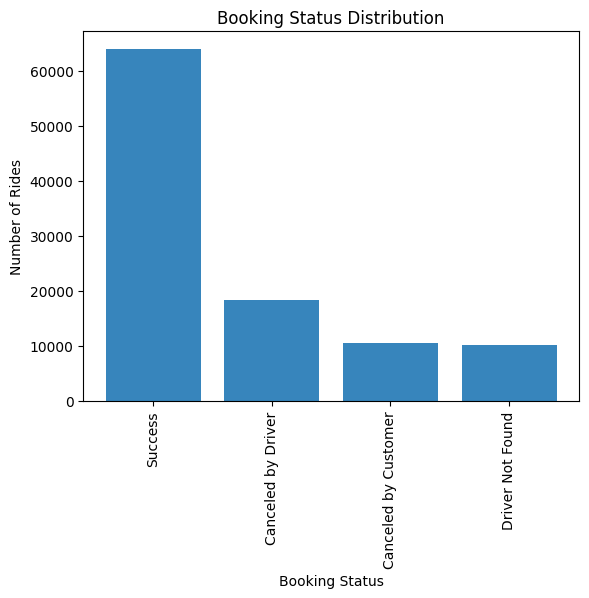

In [215]:
plt.figure()
plt.bar(status_counts.index,status_counts.values,color = '#3785BC')
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Number of Rides")
plt.xticks(rotation = 90)
plt.show()



7) Hourly Ride Demand

7.1 Hourly Booking Distribution

In [216]:
hourly_bookings = df['Hour'].value_counts().sort_index()
hourly_bookings

,count
Hour,
0,4318
1,4329
2,4305
3,4201
4,4263
5,4264
6,4271
7,4304
8,4374


7.2 Visualisation : Hourly Driver Demand Distribution

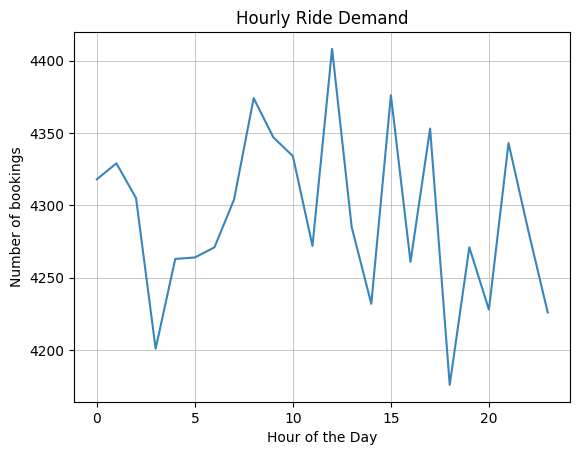

In [217]:
plt.plot(hourly_bookings.index,hourly_bookings.values,color = '#3785BC' )
plt.xlabel('Hour of the Day')
plt.ylabel('Number of bookings')
plt.title('Hourly Ride Demand')
plt.grid(True,linewidth = 0.5)
plt.show()


8) Day wise Ride Cancellations

8.1 Distribution of Cancelled Rides



In [218]:
# Filtering Cancelled Rides
cancelled_df = df[df['Booking_Status'].str.contains('Cancel', case=False)]
day_cancel = cancelled_df['Day'].value_counts()
day_cancel


,count
Day,
Monday,4787
Tuesday,4744
Wednesday,4647
Friday,3738
Saturday,3704
Thursday,3702
Sunday,3611


8.2 Visualisation : Daily Ride Cancellation Distribution

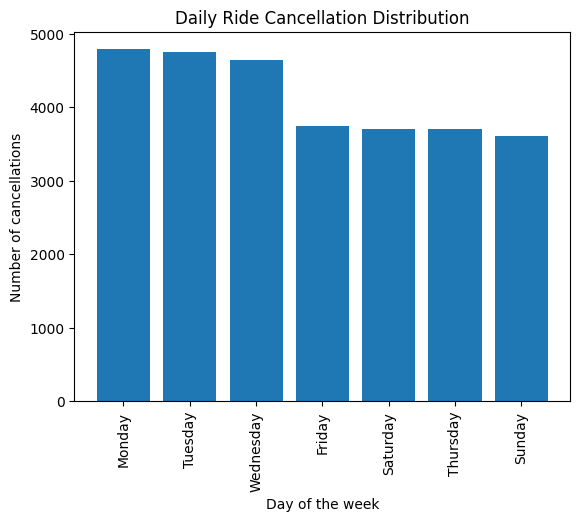

In [219]:
plt.bar(day_cancel.index,day_cancel.values)
plt.title('Daily Ride Cancellation Distribution')
plt.xlabel('Day of the week')
plt.ylabel('Number of cancellations')
plt.xticks(rotation = 90)
plt.show()

9. Vehicle Type used by the drivers

9.1 Vehicle Type Distribution

In [220]:
vehicle_used = df['Vehicle_Type'].value_counts()
vehicle_used

,count
Vehicle_Type,
Prime Sedan,14877
eBike,14816
Auto,14755
Prime Plus,14707
Bike,14662
Prime SUV,14655
Mini,14552


9.2 Visualisation : Vehicle used Distribution

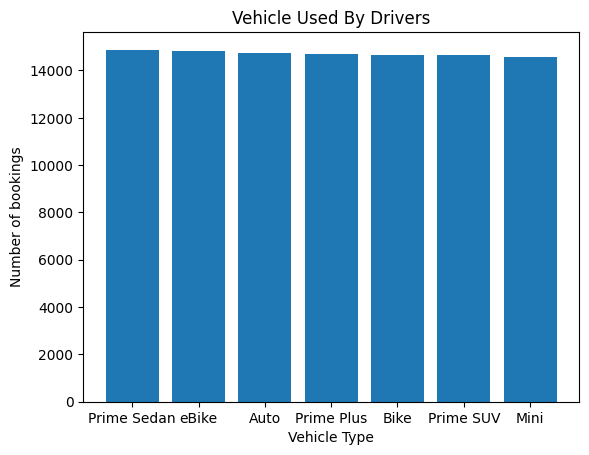

In [233]:
plt.bar(vehicle_used.index,vehicle_used.values)
plt.title('Vehicle Used By Drivers')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of bookings')
plt.show()

10. Booking Value Analysis

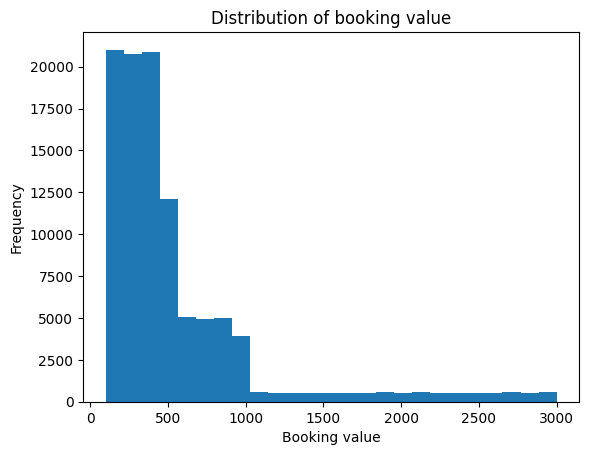

In [222]:
df['Booking_Value'].describe()
plt.hist(df['Booking_Value'], bins = 25)
plt.title('Distribution of booking value')
plt.xlabel('Booking value')
plt.ylabel('Frequency')
plt.show()


11. Rating Analysis


11.1 Driver Ratings

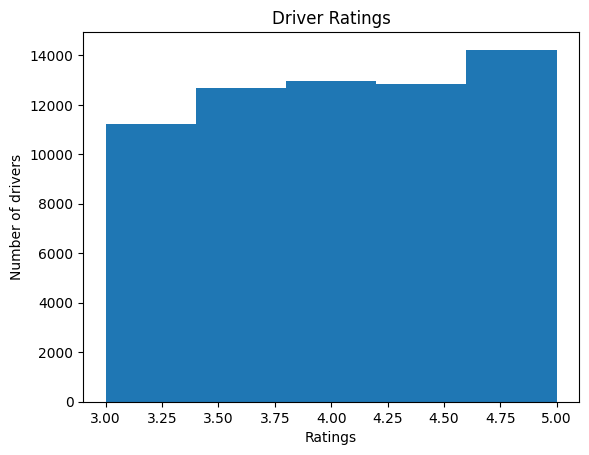

In [223]:
df['Driver_Ratings'].dropna().describe()
plt.hist(df['Driver_Ratings'].dropna(),bins = 5)
plt.title('Driver Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of drivers')
plt.show()

11.2 Customer Ratings

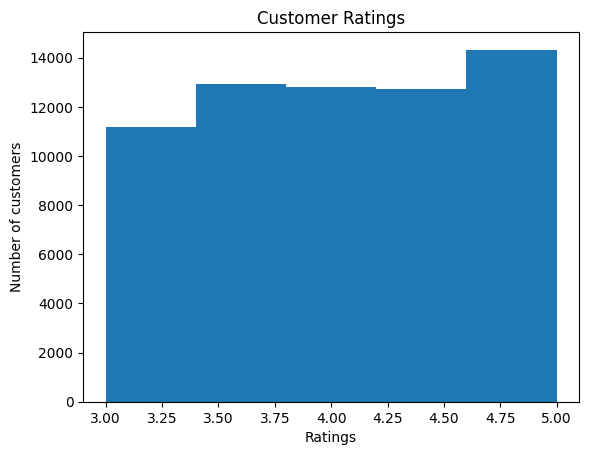

In [224]:
df['Customer_Rating'].dropna().describe()
plt.hist(df['Customer_Rating'].dropna(),bins = 5)
plt.title('Customer Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of customers')
plt.show()




12) Payment Method Analysis

12.1 Payment Method Distribution

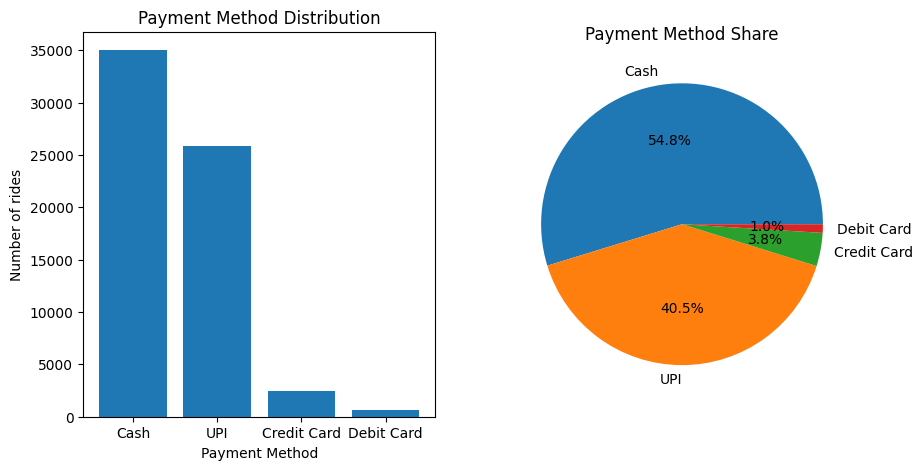

In [225]:
payments = df['Payment_Method'].value_counts()
payments
fig , ax = plt.subplots(1,2,figsize = (10,5))
ax[0].bar(payments.index,payments.values)
ax[0].set_title('Payment Method Distribution')
ax[0].set_xlabel('Payment Method')
ax[0].set_ylabel('Number of rides')
ax[1].pie(payments.values,labels = payments.index,autopct ='%1.1f%%')
ax[1].set_title('Payment Method Share')
plt.show()




13. Turnaround Time Analysis

13.1 Vehicle Turnaround Time (V_TAT)

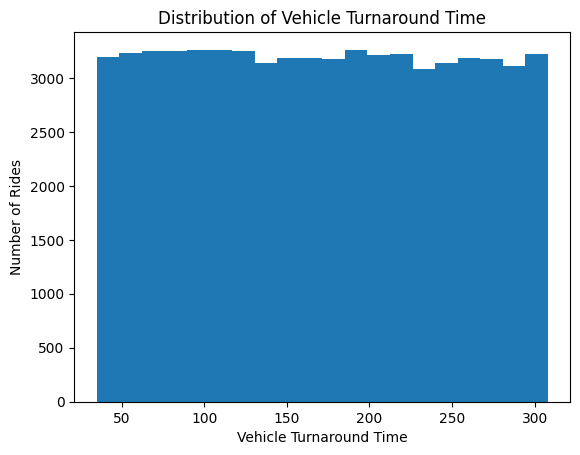

In [226]:
success_df = df[df["Booking_Status"] == "Success"]
success_df['V_TAT'].describe()
plt.hist(success_df['V_TAT'].dropna(),bins = 20)
plt.xlabel("Vehicle Turnaround Time")
plt.ylabel("Number of Rides")
plt.title("Distribution of Vehicle Turnaround Time")
plt.show()

13.2 Customer Turnaround Time (C_TAT)






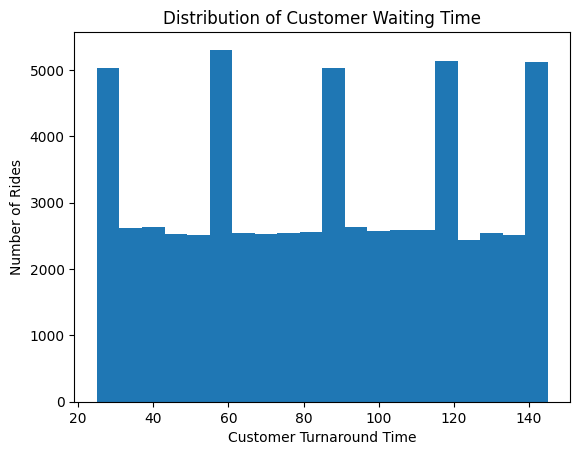

In [227]:
success_df = df[df["Booking_Status"] == "Success"]
success_df["C_TAT"].describe()
plt.hist(success_df["C_TAT"].dropna(), bins=20)
plt.xlabel("Customer Turnaround Time")
plt.ylabel("Number of Rides")
plt.title("Distribution of Customer Waiting Time")
plt.show()

14) Correlationn between Booking Value and Ride Distance

In [228]:
df[['Booking_Value','Ride_Distance']].corr()


,Booking_Value,Ride_Distance
Booking_Value,1.000000,0.000492
Ride_Distance,0.000492,1.000000


The correlation between ride distance and booking value was found to be near zero, indicating that pricing is not strictly distance-based and may be influenced by factors such as surge pricing, vehicle type, or time of booking.

15.**Conclusion**

This project presents an end-to-end EDA using Pandas, NumPy, and Matplotlib, deriving business-driven insights on ride demand patterns, booking behavior, and cancellation trends to support operational decision-making.